In [78]:
import  pandas as pd
import numpy as np
import prody
from scipy.stats.mstats import gmean,hmean
from Bio import SeqIO
import matplotlib.pyplot as plt

In [161]:
burial = pd.read_csv("../6M0J.csv")

In [165]:
burial['exposure'] = burial['depth'].apply(lambda x: int(x<3))

In [69]:
mutation_effect = pd.read_csv("../Epitopes/single_mut_effects.csv")
mutation_effect = mutation_effect.groupby("site_SARS2")[['bind_avg','expr_avg']].mean().T

In [70]:
consurf_data = pd.read_csv("/Users/zhesang/Dropbox/RBD_Nb_structures (1)/Manuscript/Figures/Figure 6/Figures_Zhe/consurf_sarb.csv")
consurf_data = consurf_data[(consurf_data['POS1']>=15)&(consurf_data['POS1']<=208)].copy()
consurf_data['POS1'] = (consurf_data['POS1'] + 318).astype(int)
consurf_data['SCORE1'] = consurf_data['SCORE1'].astype(float)
data2_consurf = consurf_data.T
data2_consurf.columns = np.arange(333,527)

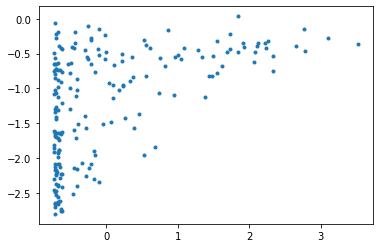

In [83]:
plt.plot(data2_consurf.loc['SCORE2'].values,mutation_effect[np.arange(333,527)].loc['expr_avg'].values,'.')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [170]:
pd.DataFrame({'19RBD':Sarb_19_id.loc['Identity'].values,\
              'exposure':burial['exposure'].values,\
              'consurf':data2_consurf.loc['SCORE2'].values,\
              'fitness':mutation_effect[np.arange(333,527)].loc['expr_avg'].values})\
.to_csv("consurf_fitness.csv")

In [97]:
Sarb_4_id

,333,334,335,336,337,338,339,340,341,342,...,517,518,519,520,521,522,523,524,525,526
Identity,0.0,0.333333,0.333333,0.0,0.0,0.0,0.666667,0.333333,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Spike_struct = prody.parsePDB("spike.pdb")
RBD_struct = prody.parsePDB("RBD.pdb")

# beta = []
# for resi in Spike_struct.getResnums():
#     count = SpikeMap[resi]
#     if count > 500:
#         count=500
#     beta.append(count)
    
# Spike_struct.setBetas(beta)
# prody.writePDB('spike_mutation_count.pdb', Spike_struct)

beta = []
for resi in RBD_struct.getResnums():
    if not resi in mutation_effect.columns:
        beta.append(-5)
        continue
    count = mutation_effect.loc['expr_avg',resi]
    beta.append(count)
RBD_struct.setBetas(beta)
prody.writePDB('RBD_fitness.pdb', RBD_struct)

@> 1559 atoms and 1 coordinate set(s) were parsed in 0.02s.


'RBD_fitness.pdb'

In [93]:
Sarb_4_data = np.zeros(201)
reader = SeqIO.parse("../Epitopes/Sarb4.fas","fasta")
sars2_align = next(reader).seq
sars1_align = next(reader).seq
RmY_align = next(reader).seq
BM_align =  next(reader).seq
for idx,(aa1,aa2,aa3,aa4) in enumerate(zip(sars2_align,sars1_align,RmY_align,BM_align)):
    if aa1==aa2:
        Sarb_4_data[idx]+=1
    if aa1==aa3:
        Sarb_4_data[idx]+=1
    if aa1==aa4:
        Sarb_4_data[idx]+=1
Sarb_4_data = 1-(Sarb_4_data/3)
Sarb_4_id = pd.DataFrame({"Identity":Sarb_4_data})
Sarb_4_id = Sarb_4_id.T
Sarb_4_id.columns = np.arange(331,532)
Sarb_4_id = Sarb_4_id[np.arange(333,527)]

In [138]:
sarb19data = pd.read_excel("19RBD_alignment.xlsx")
sarb19data = sarb19data[np.arange(331,532)]

In [143]:
sarb19data = pd.read_excel("19RBD_alignment.xlsx")
sarb19data = sarb19data[np.arange(331,532)]
ref = sarb19data.values[0,:]
others = sarb19data.values[1:,:]

Sarb_19_data = np.ones(201)

for idx,AA in enumerate(ref):
    column = others[:,idx]
    for aa in column:
        if aa == AA:
            Sarb_19_data[idx]+=1
Sarb_19_id = pd.DataFrame({"Identity":Sarb_19_data/19},index=np.arange(331,532)).T
Sarb_19_id = Sarb_19_id[np.arange(333,527)]


In [159]:
Sarb_19_id

,333,334,335,336,337,338,339,340,341,342,...,517,518,519,520,521,522,523,524,525,526
Identity,1.0,0.947368,0.578947,1.0,1.0,1.0,0.421053,0.421053,0.947368,1.0,...,1.0,1.0,0.052632,0.947368,1.0,1.0,1.0,1.0,1.0,1.0


In [158]:
#Spike_struct = prody.parsePDB("spike.pdb")
RBD_struct = prody.parsePDB("RBD.pdb")

# beta = []
# for resi in Spike_struct.getResnums():
#     count = SpikeMap[resi]
#     if count > 500:
#         count=500
#     beta.append(count)
    
# Spike_struct.setBetas(beta)
# prody.writePDB('spike_mutation_count.pdb', Spike_struct)

beta = []
for resi in RBD_struct.getResnums():
    if not resi in Sarb_19_id.columns:
        beta.append(-5)
        continue
    identity = round(Sarb_19_id.loc['Identity',resi],1)
    if identity<0.5:
        identity=0.5
    
    beta.append(identity)
RBD_struct.setBetas(beta)
prody.writePDB('RBD_Sar19RBD.pdb', RBD_struct)

@> 1559 atoms and 1 coordinate set(s) were parsed in 0.02s.


'RBD_Sar19RBD.pdb'

In [157]:
round(0.19,1)

0.2

In [141]:
Sarb_4_data = np.zeros(201)
reader = SeqIO.parse("../Epitopes/Sarb4.fas","fasta")
sars2_align = next(reader).seq
sars1_align = next(reader).seq
RmY_align = next(reader).seq
BM_align =  next(reader).seq
for idx,(aa1,aa2,aa3,aa4) in enumerate(zip(sars2_align,sars1_align,RmY_align,BM_align)):
    if aa1==aa2:
        Sarb_4_data[idx]+=1
    if aa1==aa3:
        Sarb_4_data[idx]+=1
    if aa1==aa4:
        Sarb_4_data[idx]+=1
Sarb_4_data = 1-(Sarb_4_data/3)
Sarb_4_id = pd.DataFrame({"Identity":Sarb_4_data})
Sarb_4_id = Sarb_4_id.T
Sarb_4_id.columns = np.arange(331,532)
Sarb_4_id = Sarb_4_id[np.arange(333,527)]

In [57]:
Sarb_4_id

,333,334,335,336,337,338,339,340,341,342,...,517,518,519,520,521,522,523,524,525,526
Identity,1.0,0.666667,0.666667,1.0,1.0,1.0,0.333333,0.666667,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [58]:
Sarb_4_id.loc['Identity',333]

1.0

In [67]:
#Spike_struct = prody.parsePDB("spike.pdb")
RBD_struct = prody.parsePDB("RBD.pdb")

# beta = []
# for resi in Spike_struct.getResnums():
#     count = SpikeMap[resi]
#     if count > 500:
#         count=500
#     beta.append(count)
    
# Spike_struct.setBetas(beta)
# prody.writePDB('spike_mutation_count.pdb', Spike_struct)

beta = []
for resi in RBD_struct.getResnums():
    if not resi in Sarb_4_id.columns:
        beta.append(-5)
        continue
    identity = Sarb_4_id.loc['Identity',resi]  
    beta.append(identity)
RBD_struct.setBetas(beta)
prody.writePDB('RBD_Sar4RBD_2.pdb', RBD_struct)

@> 1559 atoms and 1 coordinate set(s) were parsed in 0.02s.


'RBD_Sar4RBD_2.pdb'